# Fuhlsbüttel

I will do a explorative descriptive analysis on weather data provided by Wetterkontor for Hamburg Airport (Flughafen Fuhlsbüttel) from 27.07.2011 to 08.08.2018 consisting of 
- Minimum Temp. (°C) 
- Maximum Temp. (°C) 
- Average Temp. (°C) 
- Precipitation (l/m²) 
- Sunshine duration (h) 
- Max. gust of wind (Bft) 

[Data Source](https://www.wetterkontor.de/de/wetter/deutschland/rueckblick.asp?id=80)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import scipy.stats as st

In [2]:
# Import data from CSV file to pandas DataFrame 
df = pd.read_csv("data/fuhlsbuettel.csv", sep=",")

In [3]:
df.head()

,Date,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration,MaxWindGust
0,03.07.2008,18.4,30.1,22.8,17.8,7.2,4.0
1,04.07.2008,14.5,18.5,15.6,37.8,0.0,6.0
2,05.07.2008,13.9,24.1,18.5,0.0,7.4,4.0
3,06.07.2008,12.9,25.5,19.1,0.4,4.9,5.0
4,07.07.2008,11.5,20.4,15.7,7.2,4.3,8.0


In [4]:
df.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000
mean,5.761636,13.712517,9.854348,2.057870,4.423219
std,6.320783,8.196158,6.985165,4.283778,4.371667
min,-17.700000,-8.700000,-12.100000,0.000000,0.000000
25%,1.300000,7.500000,4.800000,0.000000,0.200000
50%,6.100000,13.900000,10.000000,0.100000,3.200000
75%,10.800000,20.100000,15.400000,2.200000,7.550000
max,21.600000,36.400000,28.000000,47.100000,15.600000


I am interested in the relationship between sunshine duration and average temperatur. 

In [5]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
SunshineDuration = df[['SunshineDuration']].values.reshape(len(df))

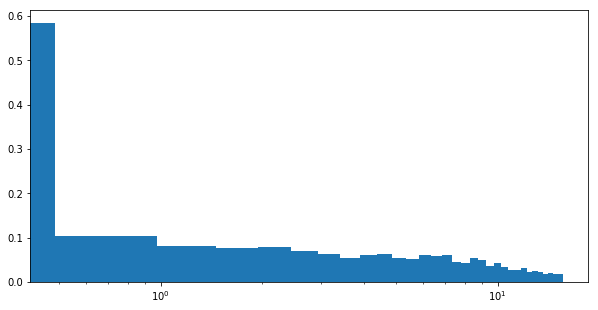

In [6]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.hist(SunshineDuration, 32, density=True)
plt.show()

I have set the x-scale to log(arithmic) because there are a lot of small values. The data is not normally distributed, which can be attributed to the definition of sunshine depending of a treshold. 

The number of bins is an approximate multiple of the maximum value (15.6 hours) * 2. 

**On sunshine duration** 

> The period of time during which sunshine is detected is called sunshine duration. The determination of whether sunshine is detected in the meteorological sense leads to a yes / no statement about one of two possible states. (...) For the objective and reproducible determination of sunshine, the irradiance of direct solar radiation is used. To be registered as sunshine, direct solar radiation must exceed the threshold of 120 W/m². The sunshine duration of a day is the sum of all periods when this threshold was exceeded. (Regulations and operating documents No. 3 (VuB 3), observer manual (BHB) of the German Weather Service) 

[Source](https://www.dwd.de/DE/leistungen/pbfb_verlag_vub/pdf_einzelbaende/vub_3_bhb_gesamt_pdf.pdf)

In [7]:
# I order to visualize the data on a horizontal axis I need to transpose the column to a row. 
df_Sunshine = pd.DataFrame(SunshineDuration).transpose()

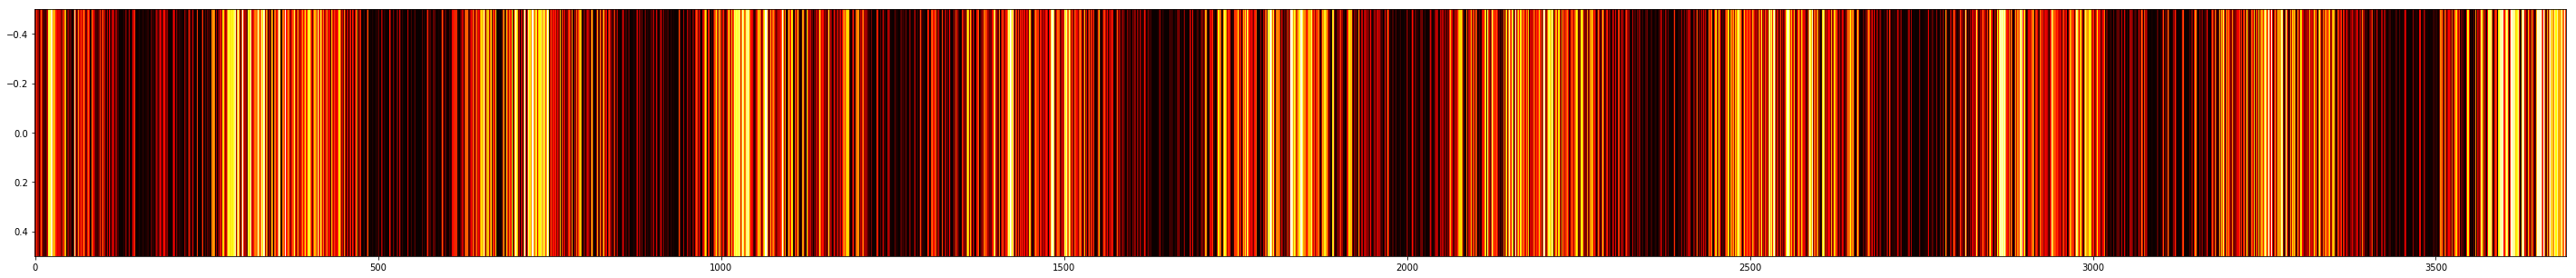

In [8]:
plt.figure(figsize=(50, 5))
plt.imshow (df_Sunshine, cmap='hot', interpolation='lanczos', aspect='auto')

I will now repeat the same steps for the average temperature. 

In [9]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
AverageTemp = df[['AverageTemp']].values.reshape(len(df))

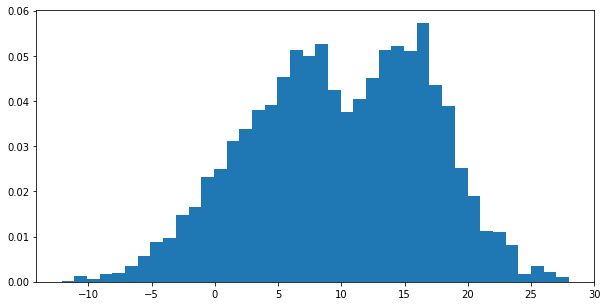

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(AverageTemp, 40, density=True)
plt.show()

I have kept the x-scale linear. Interestingly the data is not normally distributed, or at least only remotely. 

The number of bins is an approximate of the difference between the minimum (-12) and the maximum value (28). 

In [11]:
df_AverageTemp = pd.DataFrame(AverageTemp).transpose()

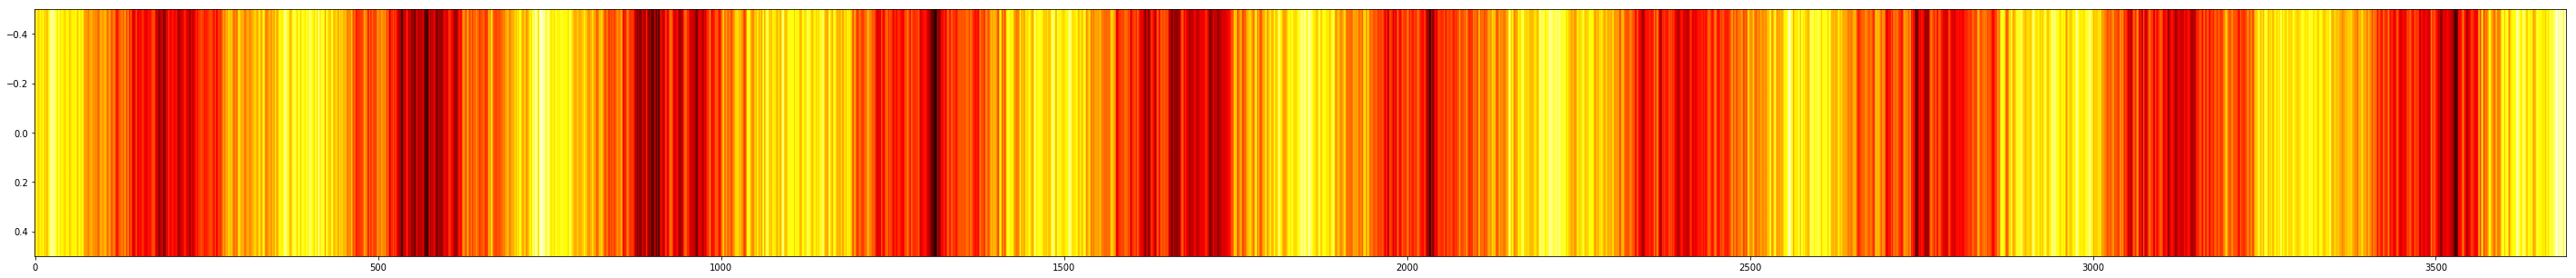

In [12]:
plt.figure(figsize=(50, 5))
plt.imshow (df_AverageTemp, cmap='hot', interpolation='lanczos', aspect='auto')

The next stept in this exploration would consist in overlaying the data for sunshine duration and average temperature and calculating the correlation. 